# Snapchat Political Ads


# Summary of Findings


### Introduction
My prediction problem will be assessing, based on given characteristics of a snapchat political adverts from 2018 and 2019, whether the advert is targetting males or females. This will be insightful for the fact that it allows developers to gain information on whether our advert will be more likely to targeting males or females. In this case, I will not be consdering adverts that target all genders, as this project is specifically looking towards targetted adverts. This will be tested based on given characteristics of the snapchat advert. If so, we will be able to make predictions with the assumption that variables are unchanging.

This project will be a classification problem because the value being predicted is a class associated with an observation. Also, the target variable, gender, is a nominal variable and is the reason why we develop a classification model.

My models will be tested and evaluated  based on the accuracy score. I decided to use accuracy as a metric due to it being easily interpretable and because it takes into account the entire dataset. I decided against the f1 score that although there's a misbalance in the distribution (females highly represented compared to males), there is no class that is more relevant than the other and both genders take a role. Getting an incorrect value for either gender is equal in importance and I believe the accuracy is able to capture the overall value of the models. However, it is now something to keep in mind that there's a possibilty of bias and also take into account our distribution of the data when evaluating our results. 

### Baseline Model
My baseline model will be based on features that I deem relevant to the target variable, gender. These features will include impressions(quantitative), spent money(quantitative), country(nominal). Month is nominal rather than ordinal due to it being spread over two years, rather than one year. Therefore, I will have 3 features, 2 of them being quantitative and the other one being a nominal variables. The other variables that I didn't count into my model were not used because most of them were detailing specifics about the advert and this would be hard to compare through out the entire dataset as it refers to only one observation. Moreover, most of the columns I dropped had the majority of its values being null. 

The one nominal variable, country, will therefore have to be one hot encoded, while the other two variables will be kept as their corresponding columns and passed through during the column transformer.

My accuracy was 0.703 and I believe this is a good starting point, given it is a baseline model. It shows that there are potentially signs that draw distinct charcateristics between the two targetted advertisements. However, approximately 30% of are being assigned the wrong label and this could be improved through feature engineering. This large number is probably due to the complexity of the variables and the overlapping connectiong between one another as variables. This demonstrates the importance of feature engineering. 

### Final Model
My first feature was extracting the month of when the advert was posted. This was done through the given start date column and using the function transformer. Marketing relies heavily on release time and therefore believed that this would be a useful attribute to utilize in our model. For example, Women's History Month is throughout the month of March, and therefore, there could be a possible increase of political adverts targetted towards females. I one hot encoded this feature, because I valued each month as its own entity. Moreover, it was over two years, so there's not really an order if I were to use them as a time variable.

My second feature was extracting the number of days the advert was posted. This was done by subtracting end date from start date and formatting to produce only the number of days for ease of analysis. I thought this would be another variable that would be good for my data because there may be speculation that different genders react differently to adverts being persistently presented to them on snapchat rather than being shown once.

I decided to use a decision tree classifier model. This is because it is easier to interpret and you can check the most important features performing in this model, which is extremely important for those developing these adverts. Moreover, the range of values were different for each quantitative variable and therefore utilizing a decision tree was useful as it required no standard scaling. I attempted to try the KNeighborsClassifier to see if it would have been a better selection of model, but the decision tree classifier performed slightly better.

I found the parameters that performed the best through GridSearchCV. I tested a range of values that were balanced between having a large range of values, and capturing optimality in our values. This was max depth being 7, min samples leaf being 5 and min samples split being 7. The reason why I made some of my additional features were because I decided that these variables that were extracted were able to capture the marketing aspect of political adverts rather than the basic attributes of the advert, which the original features showed.

Overall, the score improved by 7%, which I see as a strong improvement. For further analysis, I would start investing the split between datasets regarding false positive and false negatives.

### Fairness Evaluation
Politicals vary heavily when it comes to observing different countries. In my opinion, I see America utilizing media the most when it comes to political affairs. Therefore, I decided it would be interesting to create a subset comparing America to the rest of the world. There are many variables that correspond to this and could be further investigated for futher analysis, such as progressiveness of the country and culture.

For this, I decided to check the true positive parity as the parity measure, with the positive label being females. Therefore, my test statistic was a recall measure. There could possibly be a larger range of differences when looking at female targetted audiences and I was curious to see that specifically. I feel as though it would be more interesting to look at the difference between the adverts that were labelled correctly when it came to adverts the were targetted to a female audience. This is the reasoning behind using true positive parity because I wanted to specifically look at the correctness of labelling a female targetted advert.

Therefore, I ran a permutation test and shuffled the column with the binary values of america and the rest of the world. My null hypothesis would be the model would be similar for both subsets, america and the rest of the world. My p value was 1.0 and out of range of the randomly shuffled recall values. Therefore, with a 5% confidence interval, I rejected the null hypothesis and there was a strong bias towards one than the other. The observed difference between recall values were 0.27 in favour of the United States. Therefore, there is some bias in incorrectly labelling female targetted adverts more from the rest of the world. Perhaps there are more distinct characteristics of a female targetted advert from the USA, but these sorts of conclusion require further investigation.

# Code

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

In [136]:
#CLEANING PROCESS
#reading csv files
ads_2018 = pd.read_csv("PoliticalAds2018.csv")
ads_2019 = pd.read_csv("PoliticalAds2019.csv")
#setting options for visibility
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

#concatenating the tables together
df = pd.concat([ads_2018, ads_2019], ignore_index = True)

#Converting dates to datetime format for both StartDate and EndDate
df['StartDate'] = df['StartDate'].apply(lambda x: pd.to_datetime(x[:-1]))
df['EndDate'] = df['EndDate'].apply(lambda x: pd.to_datetime(x[:-1]) if type(x) == str else x)

#Dropping unnecessary columns and columns that could include privacy issues.
df2 = df[['Gender','Currency Code', 'Spend', 'Impressions', 'StartDate', 'EndDate'
         ,'CountryCode']]


#Clean up currency and spend
def currency_change(x):
    if x['Currency Code'] == 'EUR':
        return x['Spend']*1.08
    elif x['Currency Code'] == 'GBP':
        return x['Spend']*1.22
    elif x['Currency Code'] == 'CAD':
        return x['Spend']*0.71
    elif x['Currency Code'] == 'AUD':
        return x['Spend']*0.65
    else:
        return x['Spend']
df2['Spend'] = df2.apply(currency_change, axis = 1)
df2 = df2.drop(columns = ['Currency Code'])

#CountryCode Capitalize
df2['CountryCode'] = df2['CountryCode'].str.title()
df2 = df2.rename(columns = {'CountryCode':'Country'})

#Rename Gender
df2['Gender'] = df2['Gender'].replace({'MALE': 'Male', "FEMALE": "Female"})

#Creating new column that utilizes only the months and year of columns. I broadened it to month because it becomes
# difficult to analyze and compare each day from one another due to the wide range.

#Creating table that contains only targetted gender campaigns.
only_targetted = df2.loc[(df2['Gender'] == 'Male')  | (df2['Gender'] == 'Female')]
only_targetted = only_targetted.dropna()
only_targetted.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Gender,Spend,Impressions,StartDate,EndDate,Country
0,Female,35.00,16678,2018-11-06 18:21:20,2018-11-07 01:19:08,United States
1,Male,6.00,4846,2018-12-01 17:37:10,2018-12-11 05:37:02,Nigeria
2,Female,56.00,11770,2018-09-28 23:10:14,2018-10-17 02:00:00,United States
6,Female,57.00,11207,2018-09-28 23:10:14,2018-10-10 03:00:00,United States
32,Female,421.03,359611,2018-07-20 23:09:54,2018-09-04 03:59:00,Canada


### Baseline Model

In [271]:
#importing necessary modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

#assigning features and the target variable.
X = only_targetted.drop('Gender',axis =1)
y = only_targetted['Gender']

#distinctifying columns between quantitative vs nominal variables
qual_feat = ['Country']
num_feat = ['Spend', 'Impressions']

#Developing pipelines for each corresponding variable
#One hot encoding
qual = Pipeline([('ohe', OneHotEncoder(handle_unknown='ignore'))])
#identity function
nums = FunctionTransformer(lambda x:x)

#Pipeline to put concat all the pipelines together and developing a decision tree classifier.
ct = ColumnTransformer([('qual', qual, qual_feat), ('num', nums, num_feat)])
pl = Pipeline([('feats', ct), ('dt', DecisionTreeClassifier())])

#Creating an average of the scores that get produced from this classifier model.
scores = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    pl.fit(X_train, y_train)
    scores.append(pl.score(X_test, y_test))

pd.Series(scores).mean()

0.7037234042553183

### Final Model

In [397]:
#Extracting month from the start date in order to engineer a feature that demonstrates the month it was advertised.
month_feat = ['StartDate']
month = Pipeline(steps = [('month', FunctionTransformer(lambda x:pd.DataFrame(x.iloc[:,0].apply(lambda x: x.strftime("%B"))))), ('ohe', OneHotEncoder(handle_unknown = 'ignore'))])

#Extracting number of days posted as an engineered feature
day = Pipeline([('month', FunctionTransformer(lambda x: pd.DataFrame((x.iloc[:,0] - x.iloc[:,1]).apply(lambda x:x.days))))])
day_feat = ['EndDate', 'StartDate']

#Putting it all together to create a final model.
ct2 = ColumnTransformer([('qual', qual, qual_feat), ('num', nums, num_feat), ('day', day, day_feat), ('month', month, month_feat)])
pl2 = Pipeline([('feats', ct2), ('dt', DecisionTreeClassifier())])


In [390]:
#Using GridSearchCV to find the best parameters for this model. Tried to capture a wide range of values.
X_train, X_test, y_train, y_test = train_test_split(X, y)
parameters = {
    'dt__max_depth': [2,3,4,5,7,10,13,15,None], 
    'dt__min_samples_split':[2,3,5,7,10,15,20],
    'dt__min_samples_leaf':[5,10,15,20,25,30,35,40]
}
pl2.get_params().keys()
clf = GridSearchCV(pl2, parameters)
clf.fit(X_train, y_train)
clf.best_params_

{'dt__max_depth': 7, 'dt__min_samples_leaf': 5, 'dt__min_samples_split': 7}

In [413]:
#Attempting to use KNeighrborsClassifier
from sklearn.neighbors import KNeighborsClassifier
pl4 = Pipeline([('feats', ct2), ('knc', KNeighborsClassifier())])
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    pl4.fit(X_train, y_train)
    scores.append(pl4.score(X_test, y_test))
pd.Series(scores).mean()

0.7652382873480559

In [406]:
#Creating a pipeline with the best parameters and repeatedly tested the score of the final model to gather an average.
pl3 = Pipeline([('feats', ct2), ('dt', DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 5, min_samples_split = 7))])
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    pl3.fit(X_train, y_train)
    scores.append(pl3.score(X_test, y_test))
pd.Series(scores).mean()

0.7742287234042535

### Fairness Evaluation

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
/opt/anaco

1.0


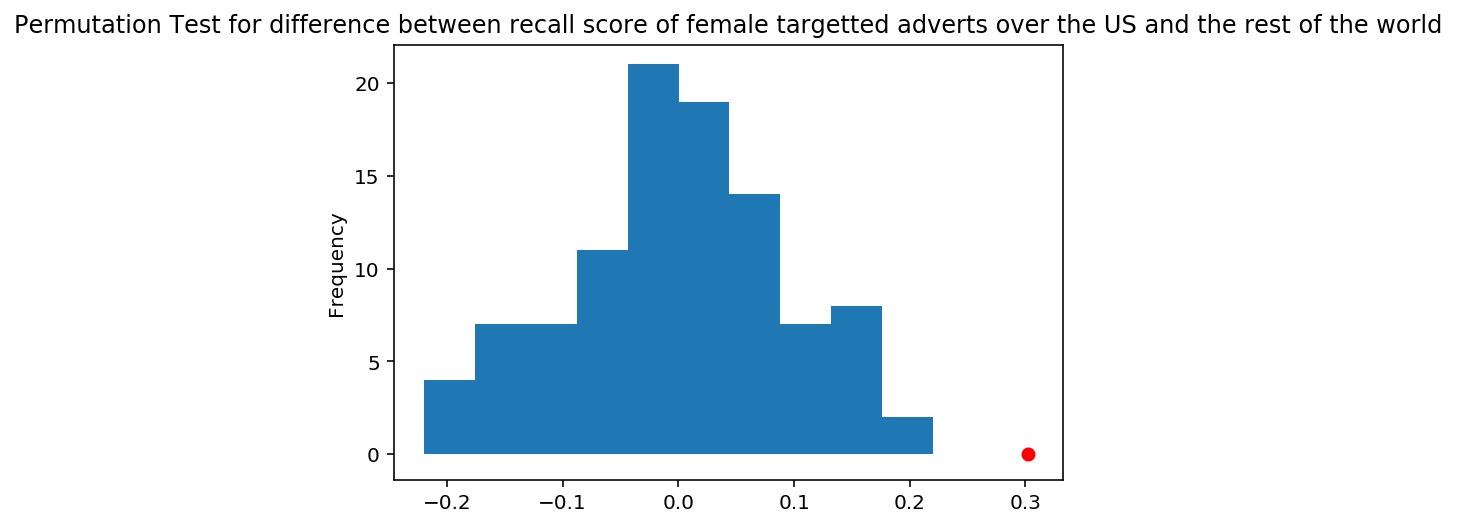

In [400]:
#Created a new column with binary values to distinguish between american adverts and adverts from the rest of the world.
only_targetted['usa'] = (only_targetted.Country == 'United States').replace({True:'USA', False:'ROW'})
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y)
#Created a new dataframe with the tested dataset that can be used for a permutation test
results = X_test
results['usa'] = (results.Country == 'United States').replace({True:'USA', False:'ROW'})
#assigning a column with the actual values
results['actual_values'] = y_test
pl2.fit(X_train, y_train)
#assigning a column with the predicted values
results['preds'] = pl2.predict(X_test)

#Conducting the permutation test
#Finding the observed value of the recall score
obs = results.groupby('usa').apply(lambda x: metrics.recall_score(x.actual_values, x.preds, pos_label = 'Female')).diff().iloc[-1]
#Resetting index
results = results.reset_index()
metrs = []
#for looping and shuffling the binary column in order to get recall scores when the samples are randomized.
for _ in range(100):
    s = (
        results[['usa', 'preds', 'actual_values']]
        .assign(usa=results.usa.sample(frac=1.0, replace=False).reset_index(drop=True))
        .groupby('usa')
        .apply(lambda x: metrics.recall_score(x.actual_values, x.preds, pos_label = 'Female'))
        .diff()
        .iloc[-1]
    )
    metrs.append(s)
    
metrs
print(pd.Series(metrs <= obs).mean())
pd.Series(metrs).plot(kind='hist', title='Permutation Test for difference between recall score of female targetted adverts over the US and the rest of the world')
plt.scatter(obs, 0, c='r');